# Final Model Recommendation

While all three models performed reasonably well, the Decision Tree Classifier provided the best trade-off between accuracy and interpretability. Its structure revealed clear threshold splits for `BMI`, `Smoking`, and `CholesterolLevel`, which are actionable for healthcare providers. Although the Random Forest model had slightly higher accuracy, it lacked transparency, which is critical in clinical settings. Therefore, the Decision Tree is recommended for deployment.

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Medical Risk Classification/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Medical-Risk-Classification.git

import sys
sys.path.append('/content/Medical-Risk-Classification.git/')
%cd /content/Deep-Learning-Classification-Captions/
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Medical-Risk-Classification'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 14.34 KiB | 638.00 KiB/s, done.
[Errno 2] No such file or directory: '/content/Deep-Learning-Classification-Captions/'
/content
/content
drive  Medical-Risk-Classification  sample_data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import joblib

In [5]:
import joblib
model = joblib.load('/content/drive/MyDrive/Professional/Portfolio/Medical Risk Classification/tree_model.pkl')

In [7]:
X_train = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/X_test.csv')
y_train = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/y_test.csv')

# Viz

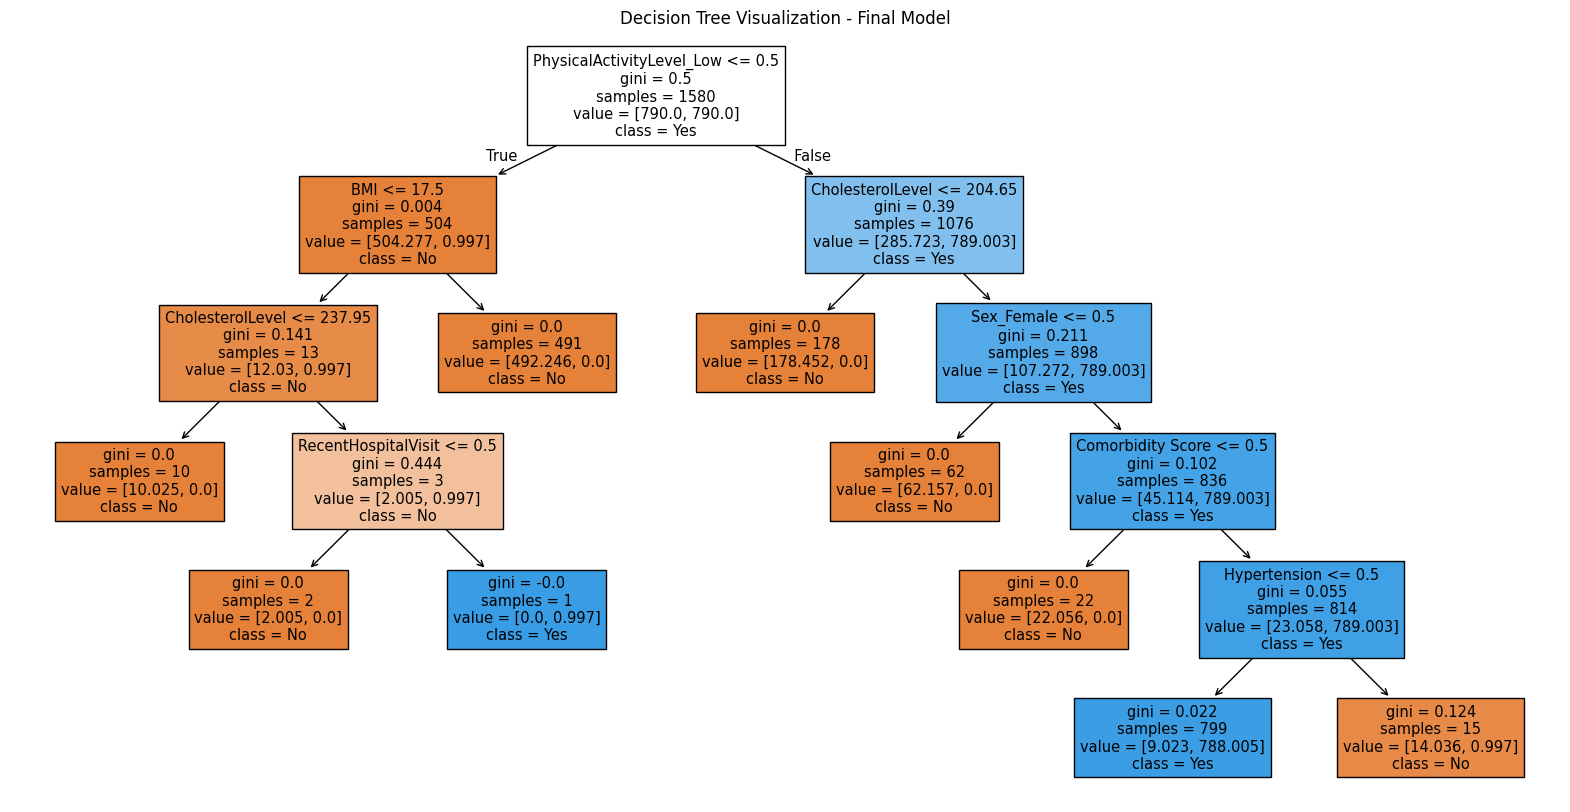

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization - Final Model")
plt.show()

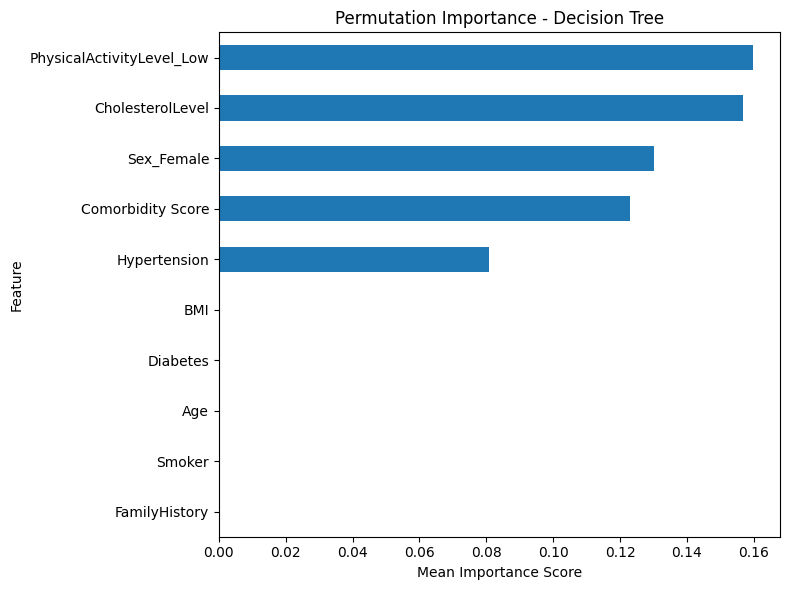

In [12]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

perm_df.sort_values(by='Importance Mean', ascending=False).head(10).plot(
    x='Feature', y='Importance Mean', kind='barh', legend=False, figsize=(8, 6))
plt.title("Permutation Importance - Decision Tree")
plt.xlabel("Mean Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()